Trabajo Practico Nº 1 Inteligencia Artificial

Alumnos: Alan Cornejo y Martin Paura

1. ¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)

La Performance la medimos a partir de que llegue a la solución, reduciendo el tiempo de procesamiento y la  cantidad de memoria utilizada.
El Enviroment es el Juego de la torre de Hanoi en un parque de diversiones (donde la gente como desafío puede programar la funcion heuristica para maximizar la Performance)
El actuador, pensamos en un drone con sopapas para agarrar los discos y camaras de video para asistir al posicionamiento.
El sensado, unas camaras laterales que le indiquen al sistema que discos se encuentran en cada torre


2. ¿Cuáles son las propiedades del entorno de trabajo?
El entorno de Trabajo es:
Totalmente observable
Episódico
discreto
Dinàmico
Con Agente Individual


3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, 
nodo de búsqueda, objetivo, acción y frontera.

Estado: son las distintas convinaciones en las que se pueden encontrar los discos en las tres torres, considerando el tamaño de los discos (no puede haber una grande arriba de una pequeña)
Espacio de Estado: es el conjunto de los distintos estados estados.
Nodo de búsqueda: Es un punto del arbol que contiene la información de un estado, un padre y los hijos que amplían la frontera y profundidad, siendo el nodo raiz el que no tiene padres y contiene la información del estado inicial.
Arbol de búsqueda: Es el entramado que se genera entre los distintos nodos y su interacción generada por las acciónes.
Acción: Mover un disco de una torre a otra considerando que no puedo poner una grande arriba de una mas pequeña. Modificando el estado y generando la interación entre los nodos padres e hijos.
Frontera: es la conformación generada en determinado momento, por aquellos nodos que no tengo conocimiento de sus nodos hijos.
Objetivo: Es el estado al que quiero llegar, es decir, el posicionamiento final deseado de los discos en las tres torres.



4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado 
en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.

Para el Trabajo Practico seleccionamos el algoritmo A*, pero teniendo en cuenta que los todos los movimientos permitidos tienen el mismo costo solo se considera en la prioridad de la cola la funciòn heurìstica.

In [133]:
from aima_libs.hanoi_states import ProblemHanoi, StatesHanoi
from aima_libs.tree_hanoi import NodeHanoi
from aima_libs.aima import PriorityQueue as AimaPriorityQueue

In [134]:
def heursitic(x: NodeHanoi):    #defino mi función heuristica
    result = 0
    Cant_Disc = len(x.state.rods[0]) +  len(x.state.rods[1]) +  len(x.state.rods[2])
    for i in range(len(x.state.rods[2])):  #Si los discos ya se encuentran en su posiciòn final los trato de dejar ahi
        if x.state.rods[2][i] ==  Cant_Disc - i:
            result -= 1**Cant_Disc
        # else:
        #     i = Cant_Disc  #en cuanto no sea el que corresponde me voy
    aux_rod = 1        
    for j in range(Cant_Disc-1,0,-1):      #Premio a que se coloquen los discos en las varillas alternadamente para poder sacar el disco mas grande y llevarlo a la varilla 2
        for i in range(len(x.state.rods[aux_rod])):
            if x.state.rods[aux_rod][i] ==  j - i:
                result -= 1**j
            # else:
            #     i = Cant_Disc  #en cuanto no sea el que corresponde me voy
        if(aux_rod == 1):
            aux_rod = 0
        else:
            aux_rod = 1
    result += (len(x.state.rods[0]) +  len(x.state.rods[1]))/5.0
    return result

In [135]:
def A_search(number_disks=5):
    # Inicializamos el problema
    list_disks = [i for i in range(number_disks, 0, -1)]
    initial_state = StatesHanoi(list_disks, [], [], max_disks=number_disks,cost=1)
    goal_state = StatesHanoi([], [], list_disks, max_disks=number_disks,cost=1)
    problem = ProblemHanoi(initial=initial_state, goal=goal_state)

    # Creamos una cola FIFO con el nodo inicial
    frontier =  AimaPriorityQueue(order='min', f=heursitic)

    frontier.append(NodeHanoi(problem.initial))
    
    # Creamos el set con estados ya visitados
    explored = set()
    
    node_explored = 0
    
    while len(frontier) != 0:
        struct_node = frontier.pop()
        node_explored += 1
        
        # Agregamos el estado del nodo al set. Esto evita guardar duplicados, porque set nunca tiene elementos repetidos
        explored.add(struct_node[1].state)
        
        if problem.goal_test(struct_node[1].state):  # Comprobamos si hemos alcanzado el estado objetivo
            metrics = {
                "solution_found": True,
                "nodes_explored": node_explored,
                "states_visited": len(explored),
                "nodes_in_frontier": len(frontier),
                "max_depth": struct_node[1].depth,
                "cost_total": struct_node[1].state.accumulated_cost,
            }
            return struct_node[1], metrics
        
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in struct_node[1].expand(problem):
            # Solo si el estado del nodo no fue explorado
            if next_node.state not in explored:               
                frontier.append(next_node)  # Corregido

    # Si no se encontro la solución, devolvemos la métricas igual
    metrics = {
        "solution_found": False,
        "nodes_explored": node_explored,
        "states_visited": len(explored),
        "nodes_in_frontier": len(frontier),
        "max_depth": struct_node.depth, # OBS: Si no se encontró la solución, este valor solo tiene sentido en breadth_first_search, en otros casos se debe ir llevando registro de cual fue la máxima profundidad
        "cost_total": None,
    }
    return None, metrics


5. ¿Qué complejidad en tiempo y memoria teórica tiene el algoritmo elegido?

Nosotros seleccionamos el algoritmo A*, en el peor de los casos la complejidad del algoritmo en memoria crece en forma exponencial dependiendo de la funcion heurìstica.


======1=====
solution_found: True
nodes_explored: 1
states_visited: 1
nodes_in_frontier: 0
max_depth: 0
cost_total: 1
Usage memorie peak: 0.0 [MB]
Execution Time: 0.0
======2=====
solution_found: True
nodes_explored: 2
states_visited: 2
nodes_in_frontier: 1
max_depth: 1
cost_total: 2.0
Usage memorie peak: 0.01 [MB]
Execution Time: 0.0010006427764892578
======3=====
solution_found: True
nodes_explored: 4
states_visited: 4
nodes_in_frontier: 3
max_depth: 3
cost_total: 4.0
Usage memorie peak: 0.01 [MB]
Execution Time: 0.0009996891021728516
======4=====
solution_found: True
nodes_explored: 8
states_visited: 8
nodes_in_frontier: 7
max_depth: 7
cost_total: 8.0
Usage memorie peak: 0.02 [MB]
Execution Time: 0.0029973983764648438
======5=====
solution_found: True
nodes_explored: 16
states_visited: 16
nodes_in_frontier: 15
max_depth: 15
cost_total: 16.0
Usage memorie peak: 0.03 [MB]
Execution Time: 0.008996963500976562
======6=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes

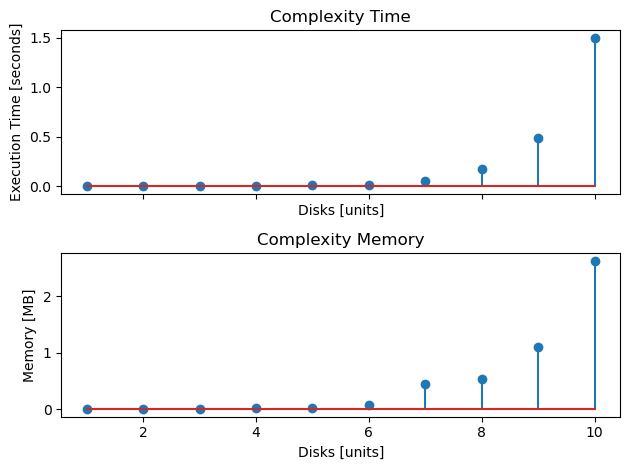

In [143]:
import tracemalloc
import time
import math as m
import matplotlib.pyplot as plt

runs = 3
number_disks_max=10
nodes_explored = []
memory_reg = []
exec_times= []
for i in range(number_disks_max):
    tracemalloc.start()
    inicio = time.time()
    
    solution, metrics = A_search(i)
    
    fin=time.time()
    
    # Para medir memoria consumida usamos el pico de memoria
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024*1024
    tracemalloc.stop()
    print(f"======{i+1}=====")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    """for nodos in solution.path():
        print(nodos)
    for act in solution.solution():
        print(act)"""
    nodes_explored.append(metrics["nodes_explored"])
    print(f"Usage memorie peak: {round(memory_peak, 2)} [MB]", )
    print(f"Execution Time: {fin-inicio}")
    exec_times.append(fin-inicio)
    memory_reg.append(round(memory_peak, 2))
    
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.stem(range(1,number_disks_max+1), exec_times)
#complexity_time_teorical = [m.pow(exec_times[9],0.1)**i for i in range(1,number_disks_max+1)]
#ax1.plot(range(1,number_disks_max+1), complexity_time_teorical)
ax1.set_title('Complexity Time')
ax1.set_ylabel('Execution Time [seconds]')
ax1.set_xlabel('Disks [units]')

ax2.stem(range(1,number_disks_max+1), memory_reg)
ax2.set_title('Complexity Memory')
ax2.set_ylabel('Memory [MB]')
ax2.set_xlabel('Disks [units]')

plt.tight_layout()
plt.show()

6. A nivel implementación, ¿qué tiempo y memoria ocupa el algoritmo? (Se recomienda correr 10 veces y calcular 
promedio y desvío estándar de las métricas).

In [137]:
import tracemalloc
import time
from queue import PriorityQueue
runs = 10
number_disks=5
nodes_explored = []
memory_reg = []
exec_times= []
for i in range(runs):
    tracemalloc.start()
    inicio = time.time()
    
    solution, metrics = A_search(number_disks)
    
    fin=time.time()
    
    # Para medir memoria consumida usamos el pico de memoria
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024*1024
    tracemalloc.stop()
    print(f"======{i+1}=====")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    """for nodos in solution.path():
        print(nodos)
    for act in solution.solution():
        print(act)"""
    nodes_explored.append(metrics["nodes_explored"])
    print(f"Usage memorie peak: {round(memory_peak, 2)} [MB]", )
    print(f"Execution Time: {fin-inicio}")
    exec_times.append(fin-inicio)
    memory_reg.append(round(memory_peak, 2))

======1=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.08 [MB]
Execution Time: 0.04100298881530762
======2=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.07 [MB]
Execution Time: 0.03508400917053223
======3=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.21 [MB]
Execution Time: 0.03301715850830078
======4=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.07 [MB]
Execution Time: 0.03200507164001465
======5=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.07 [MB]
Execution Time: 0.03170132637023926
======6=====
solution_found: True
nodes_explo

In [138]:
import statistics
#print(exec_times)
#print(memory_reg)
print(f"Tiempo promedio: {round(statistics.mean(exec_times), 4)} s")
print(f"Desviacion estandar de tiempo: {round(statistics.stdev(exec_times), 4)} s")
print(f"Memoria promedio: {round(statistics.mean(memory_reg), 2)}[MB]")
print(f"Desviacion estandar de memoria: {round(statistics.stdev(memory_reg), 2)}[MB]")

Tiempo promedio: 0.0338 s
Desviacion estandar de tiempo: 0.0028 s
Memoria promedio: 0.1[MB]
Desviacion estandar de memoria: 0.06[MB]


In [139]:
for act in solution.solution():
    print(act)

Move disk 1 from 1 to 3
Move disk 2 from 1 to 2
Move disk 1 from 3 to 2
Move disk 3 from 1 to 3
Move disk 1 from 2 to 1
Move disk 2 from 2 to 3
Move disk 1 from 1 to 3
Move disk 4 from 1 to 2
Move disk 1 from 3 to 2
Move disk 2 from 3 to 1
Move disk 1 from 2 to 1
Move disk 3 from 3 to 2
Move disk 1 from 1 to 3
Move disk 2 from 1 to 2
Move disk 1 from 3 to 2
Move disk 5 from 1 to 3
Move disk 1 from 2 to 1
Move disk 2 from 2 to 3
Move disk 1 from 1 to 3
Move disk 3 from 2 to 1
Move disk 1 from 3 to 2
Move disk 2 from 3 to 1
Move disk 1 from 2 to 1
Move disk 4 from 2 to 3
Move disk 1 from 1 to 3
Move disk 2 from 1 to 2
Move disk 1 from 3 to 2
Move disk 3 from 1 to 3
Move disk 1 from 2 to 1
Move disk 2 from 2 to 3
Move disk 1 from 1 to 3


7. Si la solución óptima es $2^k - 1$ movimientos con *k* igual al número de discos. Qué tan lejos está la solución 
del algoritmo implementado de esta solución óptima (se recomienda correr al menos 10 veces y usar el promedio de 
trayecto usado).

In [140]:
print(f"Eficiencia del Algoritmo: {round(100*(2**number_disks-1)/statistics.mean(nodes_explored),4)} %")

Eficiencia del Algoritmo: 81.5789 %


Para utilizar en simulador

Ahora ejecutemos el método que nos genera los archivos para el visualizador:

In [141]:
solution.generate_solution_for_simulator()

El método no retorna nada, pero en donde ejecutamos esta notebook se guardaron los dos archivos.

![files](./img/files.png)

Esos `JSONs` los movemos a la carpeta `simulator` y desde esa carpeta podemos ejecutar:


```bash

conda init powershell #en el powershell para poder utilizar los comandos de conda y poder cambiar de enviroment

(base) conda info --envs  #para ver los entornos disponibles

# conda environments:
#
                       C:\Users\mpaur\anaconda3
                       C:\Users\mpaur\anaconda3\envs\EntornoIA
base                 * C:\Users\mpaur\miniconda3


(base)conda activate C:\Users\mpaur\anaconda3\envs\EntornoIA

(EntornoIA) python ./simulation_hanoi.py

```

Para poder visualizar la solución encontrada.

In [142]:
!python ./simulator/simulation_hanoi.py

pygame 2.6.1 (SDL 2.32.50, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.
